In [3]:
import random
from PIL import Image, ImageDraw, ImageFont
from colorutils import Color
from configs import CFG1, Margin
from generation_utils import create_textarea, create_textbox

In [4]:
import pandas as pd

messages = pd.read_csv("texts/message_samples.csv")
options = pd.read_csv("texts/option_samples.csv")
names = pd.read_csv("texts/name_samples.csv")
messages.shape, options.shape, names.shape

((14, 5), (16, 3), (9, 2))

In [5]:
class Output:
    image:Image
    text:str
    name_text:str
    option_texts = []

def create_image(cfg: CFG1, text: str, name_text: str, option_texts = []) -> Output:
    output = Output()
    
    # bg
    bg = Image.open(cfg.bg_path).resize((cfg.W, cfg.H))
    img = bg.copy()

    # character
    fg = Image.open(cfg.fg_path)
    fg = fg.resize((int(fg.width*(cfg.H/fg.height)), cfg.H))
    img.paste(fg, cfg.fg_tl, fg)

    # message
    msgbox_size = (cfg.msgbox_br[0] - cfg.msgbox_tl[0], cfg.msgbox_br[1] - cfg.msgbox_tl[1])
    msgbox = create_textbox(
        w=msgbox_size[0],
        h=msgbox_size[1],
        hex=cfg.msgbox_hex,
        alpha=cfg.msgbox_alpha
        )

    add_ruby = "<ruby>" in text
    msg_font = ImageFont.truetype(font=cfg.msg_font_path, size=cfg.msg_font_size)
    msg_ruby_font = ImageFont.truetype(font=cfg.msg_ruby_font_path, size=cfg.msg_ruby_font_size)
    msg_text_img, rendered_msg = create_textarea(
        text,
        w=msgbox_size[0]-(cfg.msg_margin.left+cfg.msg_margin.right),
        h=msgbox_size[1]-(cfg.msg_margin.top+cfg.msg_margin.bottom),
        margin=cfg.msg_margin,
        font=msg_font, font_color=cfg.msg_font_color,
        character_spacing=cfg.msg_character_spacing, line_spacing=cfg.msg_line_spacing,
        add_ruby=add_ruby,
        ruby_font=msg_ruby_font, ruby_font_color=cfg.msg_font_color,
        ruby_character_spacing=cfg.msg_ruby_character_spacing, ruby_line_spacing=cfg.msg_ruby_line_spacing
        )

    msgbox.paste(msg_text_img, (0, 0), msg_text_img)
    img.paste(msgbox, cfg.msgbox_tl, msgbox)
    output.text = rendered_msg

    # name
    if name_text is not None:
        namebox_size = (cfg.namebox_br[0] - cfg.namebox_tl[0], cfg.namebox_br[1] - cfg.namebox_tl[1])
        namebox = create_textbox(
            w=namebox_size[0],
            h=namebox_size[1],
            hex=cfg.namebox_hex,
            alpha=cfg.namebox_alpha
            )

        add_ruby = "<ruby>" in name_text
        name_font = ImageFont.truetype(font=cfg.name_font_path, size=cfg.name_font_size)
        name_ruby_font = ImageFont.truetype(font=cfg.name_ruby_font_path, size=cfg.name_ruby_font_size)
        name_text_img, rendered_name = create_textarea(
            name_text,
            w=namebox_size[0]-(cfg.name_margin.left+cfg.name_margin.right),
            h=namebox_size[1]-(cfg.name_margin.top+cfg.name_margin.bottom),
            margin=cfg.name_margin,
            font=name_font, font_color=cfg.name_font_color,
            character_spacing=cfg.name_character_spacing, line_spacing=cfg.name_line_spacing,
            add_ruby=add_ruby,
            ruby_font=name_ruby_font, ruby_font_color=cfg.name_font_color,
            ruby_character_spacing=cfg.name_ruby_character_spacing, ruby_line_spacing=cfg.name_ruby_line_spacing
            )
        namebox.paste(name_text_img, (0, 0), name_text_img)
        img.paste(namebox, cfg.namebox_tl, namebox)
        output.name_text = rendered_name

    # options
    if len(options) > 0:
        optionbox_size = (cfg.optionbox_br[0] - cfg.optionbox_tl[0], cfg.optionbox_br[1] - cfg.optionbox_tl[1])
        optionbox = create_textbox(
            w=optionbox_size[0],
            h=optionbox_size[1],
            hex=cfg.optionbox_hex,
            alpha=cfg.optionbox_alpha
            )

        add_ruby = "<ruby>" in option_texts[0]
        option_font = ImageFont.truetype(font=cfg.option_font_path, size=cfg.name_font_size)
        option_ruby_font = ImageFont.truetype(font=cfg.option_ruby_font_path, size=cfg.name_ruby_font_size)
        option_text_img, rendered_option = create_textarea(
            option_texts[0],
            w=optionbox_size[0]-(cfg.option_margin.left+cfg.option_margin.right),
            h=optionbox_size[1]-(cfg.option_margin.top+cfg.option_margin.bottom),
            margin=cfg.option_margin,
            font=option_font, font_color=cfg.option_font_color,
            character_spacing=cfg.option_character_spacing, line_spacing=cfg.option_line_spacing,
            add_ruby=add_ruby,
            ruby_font=option_ruby_font, ruby_font_color=cfg.option_font_color,
            ruby_character_spacing=cfg.option_ruby_character_spacing, ruby_line_spacing=cfg.option_ruby_line_spacing
            )
        optionbox.paste(option_text_img, (0, 0), option_text_img)
        img.paste(optionbox, cfg.optionbox_tl, optionbox)
        output.option_texts.append(rendered_option)

    # option2
    if len(options) > 1:
        optionbox2 = create_textbox(
            w=optionbox_size[0],
            h=optionbox_size[1],
            hex=cfg.optionbox_hex,
            alpha=cfg.optionbox_alpha
            )

        add_ruby = "<ruby>" in option_texts[1]
        option2_text_img, rendered_option2 = create_textarea(
            option_texts[1],
            w=optionbox_size[0]-(cfg.option_margin.left+cfg.option_margin.right),
            h=optionbox_size[1]-(cfg.option_margin.top+cfg.option_margin.bottom),
            margin=cfg.option_margin,
            font=option_font, font_color=cfg.option_font_color,
            character_spacing=cfg.option_character_spacing, line_spacing=cfg.option_line_spacing,
            add_ruby=add_ruby,
            ruby_font=option_ruby_font, ruby_font_color=cfg.option_font_color,
            ruby_character_spacing=cfg.option_ruby_character_spacing, ruby_line_spacing=cfg.option_ruby_line_spacing
            )
        optionbox2.paste(option2_text_img, (0, 0), option2_text_img)
        img.paste(optionbox2, cfg.optionbox2_tl, optionbox2)
        output.option_texts.append(rendered_option2)
    output.image = img
    return output

'<ruby>貧乏神<rt>びんぼうかみ</rt></ruby>と<ruby>喧嘩<rt>けんか</rt></ruby>しても、どうせ負けるから。それに<ruby>私<rt>わたくし</rt></ruby>はお<ruby>金<rt>かね</rt></ruby>が大好きだから'

'Amber Kay Khan'

'トライアルダンジョン、か。'

'<ruby>奴<rt>やつ</rt></ruby>ら、もう<ruby>一人<rt>ひとり</rt></ruby>......お忘れですわね。'

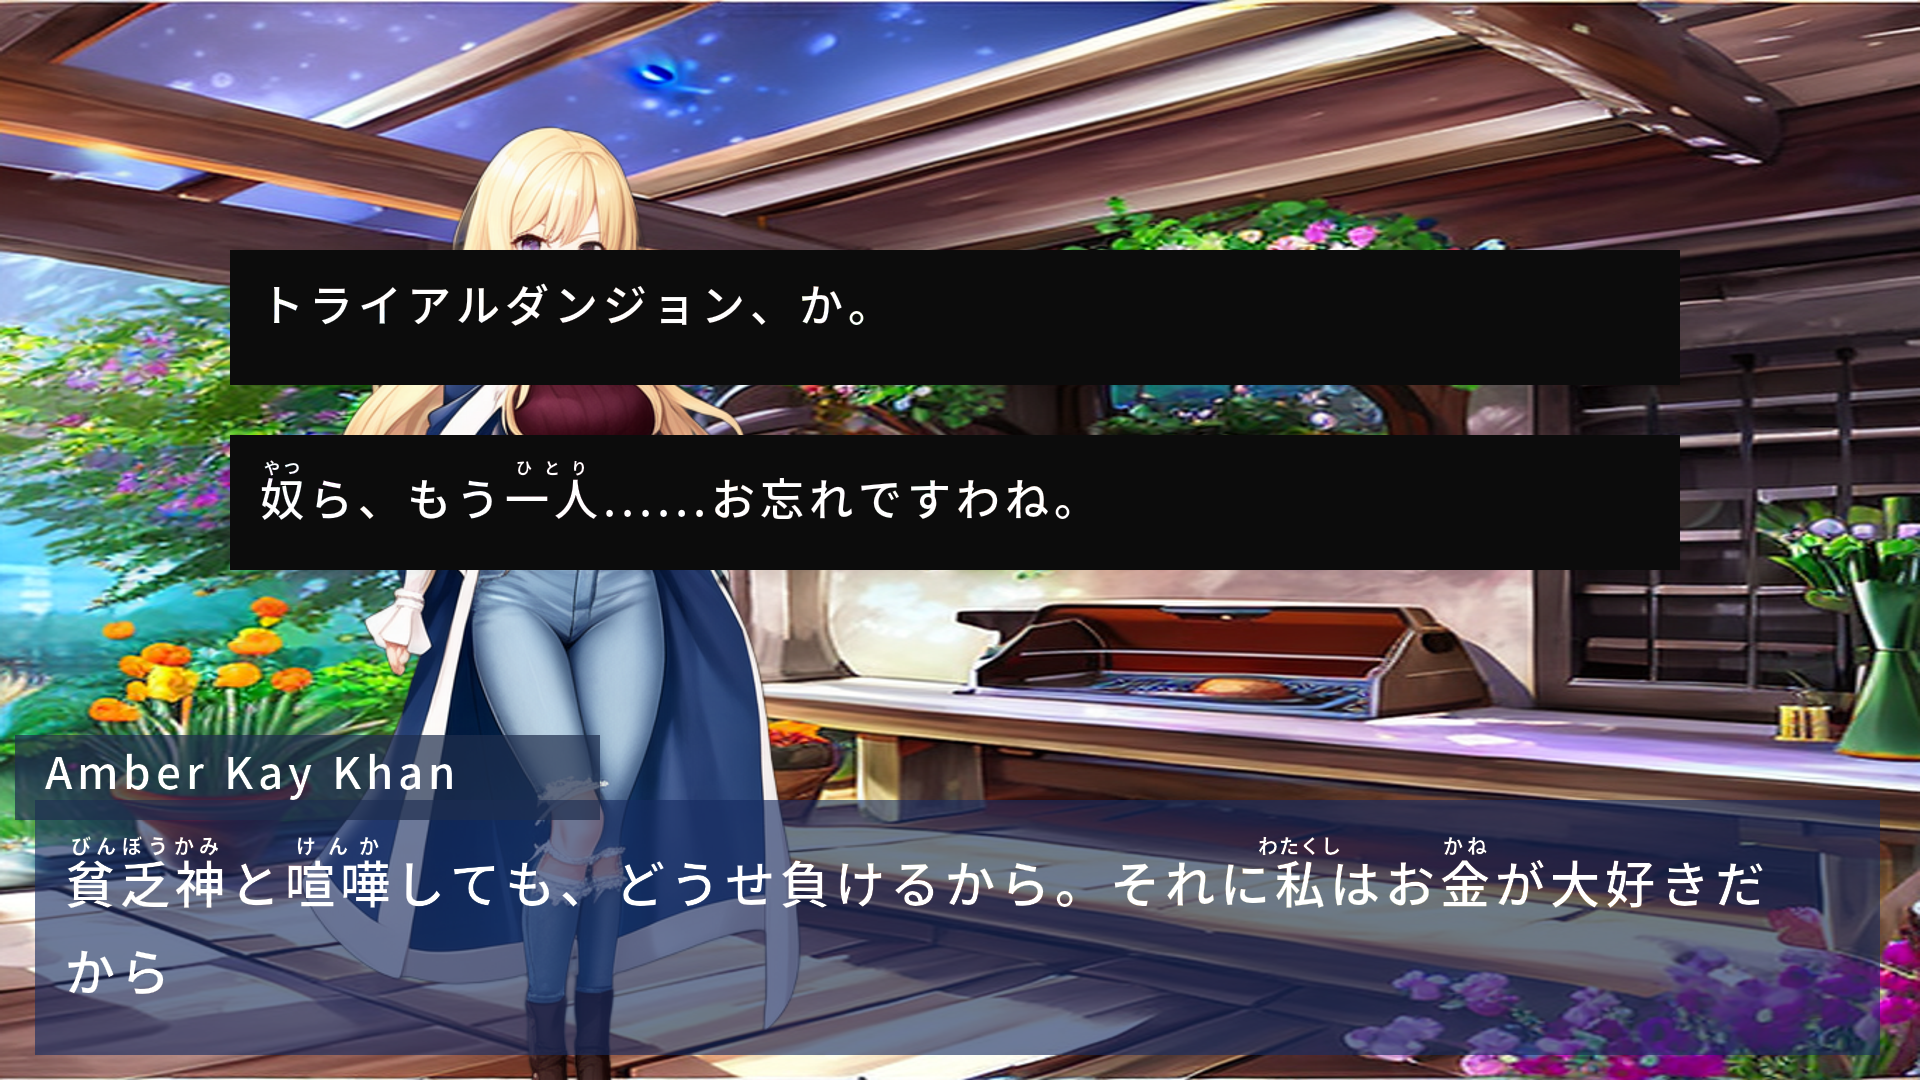

In [6]:
text = messages.sample(1)["text_ruby_hiragana"].values[0]
option_text = options.sample(1)["text_ruby_hiragana"].values[0]
option2_text = options.sample(1)["text_ruby_hiragana"].values[0]

name_text, name_ruby = names.sample(1)[["name", "ruby"]].values[0]
if type(name_ruby) == str:
    name_text = f"<ruby>{name_text}<rt>{name_ruby}</rt></ruby>"
display(text, name_text, option_text, option2_text)

cfg = CFG1()
output = create_image(cfg, text, name_text, [option_text, option2_text])
display(output.image)

In [7]:
output.text, output.name_text, output.option_texts

('<ruby>貧乏神<rt>びんぼうかみ</rt></ruby>と<ruby>喧嘩<rt>けんか</rt></ruby>しても、どうせ負けるから。それに<ruby>私<rt>わたくし</rt></ruby>はお<ruby>金<rt>かね</rt></ruby>が大好きだから',
 'Amber Kay Khan',
 ['トライアルダンジョン、か。',
  '<ruby>奴<rt>やつ</rt></ruby>ら、もう<ruby>一人<rt>ひとり</rt></ruby>......お忘れですわね。'])

In [ ]:
output.img.save("./outputs/image.png")